In [0]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'drive/Traffic-CARND-Project2/train.p'
validation_file='drive/Traffic-CARND-Project2/valid.p'
testing_file = 'drive/Traffic-CARND-Project2/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = [X_train.shape[1],X_train.shape[2]]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = [32, 32]
Number of classes = 43


Text(0.5,1,'25')

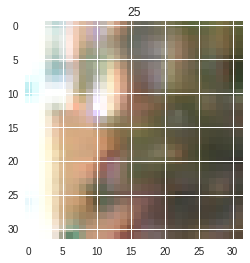

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline
example=random.randint(0,len(X_train))
plt.imshow(X_train[example,:,:,:])
plt.title(y_train[example])

In [4]:
#to find the number of unique images in the test set
import numpy as np

unique_images,image_count=np.unique(y_train,return_counts=True)
for i in range(len(unique_images)):
    print("Image number: {}, count: {}".format(unique_images[i]+1,image_count[i]))

Image number: 1, count: 180
Image number: 2, count: 1980
Image number: 3, count: 2010
Image number: 4, count: 1260
Image number: 5, count: 1770
Image number: 6, count: 1650
Image number: 7, count: 360
Image number: 8, count: 1290
Image number: 9, count: 1260
Image number: 10, count: 1320
Image number: 11, count: 1800
Image number: 12, count: 1170
Image number: 13, count: 1890
Image number: 14, count: 1920
Image number: 15, count: 690
Image number: 16, count: 540
Image number: 17, count: 360
Image number: 18, count: 990
Image number: 19, count: 1080
Image number: 20, count: 180
Image number: 21, count: 300
Image number: 22, count: 270
Image number: 23, count: 330
Image number: 24, count: 450
Image number: 25, count: 240
Image number: 26, count: 1350
Image number: 27, count: 540
Image number: 28, count: 210
Image number: 29, count: 480
Image number: 30, count: 240
Image number: 31, count: 390
Image number: 32, count: 690
Image number: 33, count: 210
Image number: 34, count: 599
Image num

In [0]:
##Converting Image to grayscale
X_train = np.sum(X_train/3, axis=3, keepdims=True)
X_valid = np.sum(X_valid/3, axis=3, keepdims=True)
X_test  = np.sum(X_test/3, axis=3, keepdims=True)

In [0]:
##Normalizing the images between 0 and 1
X_train = (X_train - 128)/128 
X_test= (X_test - 128)/128
X_valid=(X_valid-128)/128


In [0]:
#shuffle the dataset
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_train=X_train.reshape(len(X_train),32,32,1)
X_valid=X_valid.reshape(len(X_valid),32,32,1)
X_test=X_test.reshape(len(X_test),32,32,1)

In [0]:
import tensorflow as tf

EPOCHS = 40
BATCH_SIZE = 128

In [0]:
### Define your architecture here.
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1   = tf.nn.relu(conv1)

    #Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #Activation.
    conv2 = tf.nn.relu(conv2)
    x_1   = flatten(conv2) #Shape: 1600

    #Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
   
    #Layer 3: Convolutional. Output = 3x3x32.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 32), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(32))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    conv3   = tf.nn.relu(conv3)
   
    #Flatten. Input = 3x3x32. Output = 288.
    x_2   = flatten(conv3)
    
    final_fc=tf.concat([x_1, x_2], 1)  #shape: 288+1600=1888
    final_fc=tf.nn.dropout(final_fc,keep_prob)
    # SOLUTION: Layer 3: Fully Connected. Input = 1888. Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1888, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(final_fc, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 1024. Output = 512.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 512), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(512))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 512. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(512, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [0]:
x = tf.placeholder(tf.float32, (None, 32, 32,1))
y = tf.placeholder(tf.int32, (None))
keep_prob=tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y,43)


In [11]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [0]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [15]:
with tf.Session() as sess:
    #tf.initialize_all_variables().run()
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    num_examples = len(X_train)
    accuracy=[]
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        accuracy.append(validation_accuracy)
        if i==0:
          continue
        if(np.amax(accuracy)<=validation_accuracy):
            saver.save(sess, 'drive/Traffic-CARND-Project2/lenet-traffic3/model')
            print("Model saved")
        

Training...

EPOCH 1 ...
Validation Accuracy = 0.898

EPOCH 2 ...
Validation Accuracy = 0.925

Model saved
EPOCH 3 ...
Validation Accuracy = 0.927

Model saved
EPOCH 4 ...
Validation Accuracy = 0.923

EPOCH 5 ...
Validation Accuracy = 0.943

Model saved
EPOCH 6 ...
Validation Accuracy = 0.946

Model saved
EPOCH 7 ...
Validation Accuracy = 0.945

EPOCH 8 ...
Validation Accuracy = 0.931

EPOCH 9 ...
Validation Accuracy = 0.952

Model saved
EPOCH 10 ...
Validation Accuracy = 0.934

EPOCH 11 ...
Validation Accuracy = 0.940

EPOCH 12 ...
Validation Accuracy = 0.946

EPOCH 13 ...
Validation Accuracy = 0.944

EPOCH 14 ...
Validation Accuracy = 0.946

EPOCH 15 ...
Validation Accuracy = 0.942

EPOCH 16 ...
Validation Accuracy = 0.939

EPOCH 17 ...
Validation Accuracy = 0.946

EPOCH 18 ...
Validation Accuracy = 0.946

EPOCH 19 ...
Validation Accuracy = 0.948

EPOCH 20 ...
Validation Accuracy = 0.957

Model saved
EPOCH 21 ...
Validation Accuracy = 0.945

EPOCH 22 ...
Validation Accuracy = 0.954



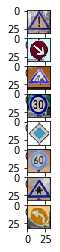

In [3]:
import cv2
#reading in an image
import glob

images = [cv2.imread(file) for file in glob.glob("/Users/thiyagarajanramanathan/Desktop/Traffic-Sign-Classifier/new-traffic-signs/*x.png")]
import matplotlib.pyplot as plt
for i in range(1,9):
    plt.subplot(8,1,i)
    plt.imshow(images[i-1])



In [0]:
images=np.asarray(images)
images.shape
import matplotlib.pyplot as plt

In [19]:
##Test image accuracy
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('drive/Traffic-CARND-Project2'))
    #sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('drive/Traffic-CARND-Project2/lenet-traffic3/model.meta')
    saver.restore(sess, "drive/Traffic-CARND-Project2/lenet-traffic3/model")

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from drive/Traffic-CARND-Project2/lenet-traffic3/model
Test Accuracy = 0.941


In [0]:
y_new_images=[18, 34, 38, 25, 1, 3, 11, 12]
images = np.sum(images/3, axis=3, keepdims=True)
images = (images - 128)/128 

In [22]:
##New Image Accuracy
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('drive/Traffic-CARND-Project2/lenet-traffic3/model.meta')
    saver.restore(sess, "drive/Traffic-CARND-Project2/lenet-traffic3/model")

    accuracy = evaluate(images, y_new_images)
    print("New Image Accuracy = {:.3f}".format(accuracy))

INFO:tensorflow:Restoring parameters from drive/Traffic-CARND-Project2/lenet-traffic3/model
New Image Accuracy = 0.875


In [0]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)

In [25]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('drive/Traffic-CARND-Project2/lenet-traffic3/model.meta')
    saver.restore(sess, "drive/Traffic-CARND-Project2/lenet-traffic3/model")
    
    new_softmax_logits = sess.run(softmax_logits, feed_dict={x: images, keep_prob: 1.0})
    new_top_k = sess.run(top_k, feed_dict={x:images, keep_prob: 1.0})
    print(new_top_k)

INFO:tensorflow:Restoring parameters from drive/Traffic-CARND-Project2/lenet-traffic3/model
TopKV2(values=array([[1.0000000e+00, 8.6884175e-23, 2.0142048e-25],
       [1.0000000e+00, 1.2785477e-13, 1.1878817e-13],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [7.6252300e-01, 1.8973532e-01, 2.0012550e-02],
       [1.0000000e+00, 1.6612581e-09, 2.4002116e-15],
       [9.9971205e-01, 2.8567441e-04, 2.2562137e-06],
       [1.0000000e+00, 7.0277811e-15, 2.8925276e-21],
       [1.0000000e+00, 1.1669156e-18, 2.0483256e-21]], dtype=float32), indices=array([[18, 38, 26],
       [34, 35, 15],
       [38,  0,  1],
       [11, 39, 25],
       [ 1,  5,  2],
       [ 3, 10, 20],
       [11, 30,  5],
       [12, 40, 35]], dtype=int32))
